#  <span style="color:blue">AutoML com Pycaret</span>

Objetivo: utilizar o dataset volkswagen disponível no Kaggle: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes para estimar o preço de um veiculo. 


#### Carregando o módulo de regressão.

In [64]:
from pycaret.regression import *
import pandas as pd
import seaborn as sns

# DATA ANALYSIS

#### Carregando os dados.

In [65]:
dataset = pd.read_csv("datasets/volkswagen.csv")

In [66]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Descrição dos dados: 
- **model**: modelo do veículo.
- **year**: ano de fabricação.
- **price**: preço de venda do veículo.
- **transmission**: tipo de transmissão.
- **mileage**: total de milhas rodadas.
- **fueltype**: tipo de combustível aceito.
- **tax**: taxa de transito.
- **mpg**: milhas por galão.
- **enginesize**: tamanho do motor.

#### Verificando a forma dos dados.

In [67]:
dataset.shape

(15157, 9)

#### Verificando as informações dos atributos.

In [68]:
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


#### Listando registros missing por atributo.

In [70]:
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#### Percentual de registros por modelo.

In [71]:
print(dataset["model"].value_counts() / len(dataset))

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Caddy Maxi         0.000264
 Fox                0.000264
Name: model, dtype: float64


#### Quantitativo de registros por tipo de combustível.

In [72]:
dataset["fuelType"].value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

#### Quantitativo de veículos por ano de fabricação.

<AxesSubplot:xlabel='count', ylabel='year'>

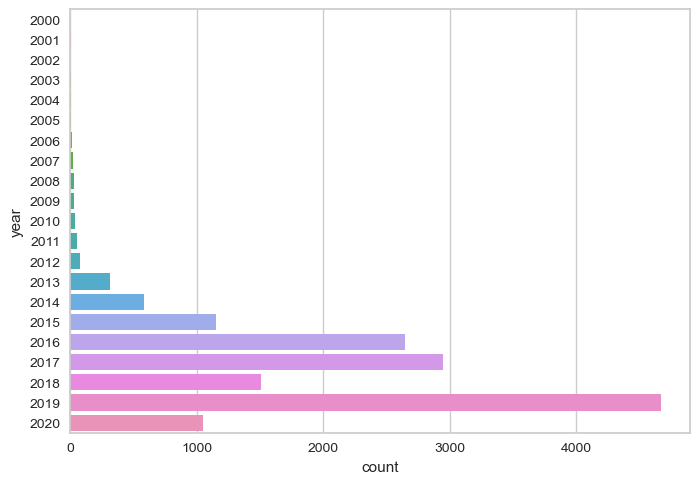

In [73]:
sns.countplot(y = dataset["year"])

# MODELAGEM

#### Separando os dados em treino e teste

##### Selecionando 95% dos dados dados de forma aleatória.

In [74]:
data = dataset.sample(frac=0.95, random_state=786)

##### Atribuindo os 5% restante para o dataframe de validação.

In [75]:
data_validation = dataset.drop(data.index)

##### Excluindo os demais registros.

In [76]:
data.reset_index(inplace=True, drop=True)
data_validation.reset_index(inplace=True, drop=True)

##### Dados utilizados para modelagem e validação.

In [77]:
print('Dados para modelagem: ' + str(data.shape))
print('Dados reservados para a validação: ' + str(data_validation.shape))

Dados para modelagem: (14399, 9)
Dados reservados para a validação: (758, 9)


In [78]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


# Configurando o ambiente com a função Setup.

Inspecionando os dados para criar o pipeline de transformação.

In [79]:
exp_clf01 = setup(   data = data
                    ,experiment_name = "regressao01" 
                    ,target = 'price'
                    ,session_id = 123 # seed, is the 'random_state' in scikit-learn.
                    ,profile = True # Equal to pandas profiling,  give a several analysis 
                 )

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(14399, 9)"
4,Transformed data shape,"(14399, 14)"
5,Transformed train set shape,"(10079, 14)"
6,Transformed test set shape,"(4320, 14)"
7,Numeric features,5
8,Categorical features,3
9,Preprocess,True


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

In [80]:
exp_clf01 = setup(   data = data # data set 
                    ,experiment_name = "regressao01" 
                    ,target = 'price'
                    ,session_id = 123 
                    ,profile = False 
                    ,transform_target = True # target transformation to let the var close to normal distribution 
                    ,normalize = True # Normalize the features variables
                    ,bin_numeric_features = ['tax']
                 )

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(14399, 9)"
4,Transformed data shape,"(14399, 14)"
5,Transformed train set shape,"(10079, 14)"
6,Transformed test set shape,"(4320, 14)"
7,Numeric features,5
8,Categorical features,3
9,Preprocess,True


##### Armazenando o Dataframe transformado.

In [81]:
df_transformed = get_config("X_train")

In [82]:
df_transformed.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
3933,Tiguan,2017,Manual,34026,Diesel,145,58.900002,2.0
2124,Passat,2016,Manual,51204,Diesel,20,68.900002,1.6
9681,Golf,2015,Manual,20761,Petrol,30,53.299999,1.4
5927,Passat,2020,Semi-Auto,15,Diesel,145,49.599998,1.6
3488,Arteon,2019,Semi-Auto,2269,Petrol,145,40.400002,1.5


# Comparando modelos

Esta função treina e compara a performance de todos os modelos para a tarefa de Regressão utilizando cross validation e retorna as métricas para avaliação e o tempo de treinamento.

In [83]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1223.5981,3436436.2302,1851.9817,0.9419,0.1064,0.0760,1.2340
gbr,Gradient Boosting Regressor,1347.7182,3593676.2262,1894.9915,0.9392,0.1103,0.0845,1.1890
lightgbm,Light Gradient Boosting Machine,1693.2218,5378067.6188,2318.2118,0.9089,0.1417,0.1117,1.4530
et,Extra Trees Regressor,1776.4963,5936619.6034,2435.2833,0.8995,0.1417,0.1130,1.2450
lr,Linear Regression,1702.6812,6298059.0323,2509.1048,0.8934,0.1302,0.0998,2.1410
ridge,Ridge Regression,1702.6545,6295933.0849,2508.6830,0.8934,0.1301,0.0998,1.0910
br,Bayesian Ridge,1702.6575,6295805.2222,2508.6576,0.8934,0.1301,0.0998,1.1190
lar,Least Angle Regression,1726.4204,6435454.9545,2535.9873,0.8909,0.1322,0.1017,1.1040
huber,Huber Regressor,1700.6528,6518942.7503,2552.6824,0.8896,0.1302,0.0991,1.1290
ada,AdaBoost Regressor,1958.5084,6847907.8213,2615.3003,0.8839,0.1569,0.1278,1.1640


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

##### Verificando o retorno da função.

In [84]:
print(best_model)

KNeighborsRegressor(n_jobs=-1)


# Criando o Modelo

Esta função treina o modelo especificado utilizando cross validation e retorna suas métricas.

In [85]:
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1213.7679,3445683.8314,1856.2553,0.9429,0.1048,0.0764
1,1214.6330,3639902.7155,1907.8529,0.9369,0.1088,0.0726
2,1235.9990,3702765.3612,1924.2571,0.9395,0.0979,0.0713
3,1284.7712,3727503.5342,1930.6744,0.9416,0.1138,0.0821
4,1261.5983,3423574.4050,1850.2904,0.9403,0.1163,0.0796
5,1142.6231,2822019.3417,1679.8867,0.9475,0.1027,0.0741
6,1211.7253,3531818.8912,1879.3134,0.9424,0.0994,0.0742
7,1199.2835,3024627.2129,1739.1455,0.9460,0.1014,0.0741
8,1216.9905,3298365.3344,1816.1402,0.9458,0.1059,0.0753


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Verificando o objeto criado.

In [86]:
print(model)

KNeighborsRegressor(n_jobs=-1)


# Exibindo graficamente a performance do modelo

Com esta função podemos analisar a performance do modelo através de gráficos.

### Residuais Plot

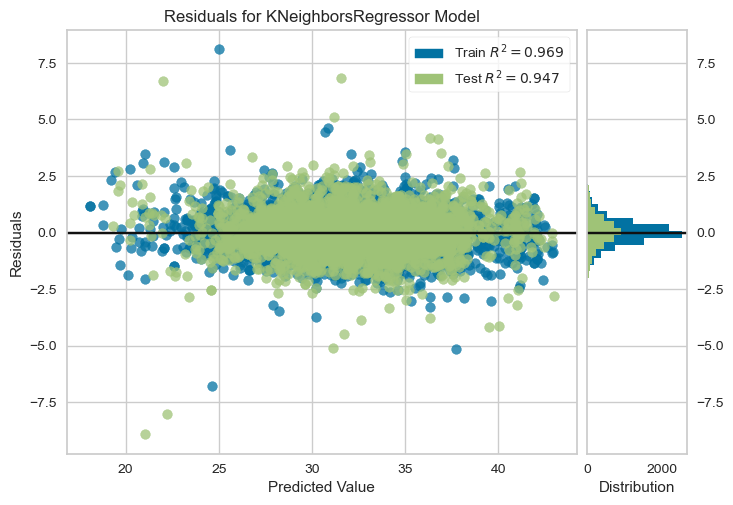

In [87]:
plot_model(model)

### Error Plot

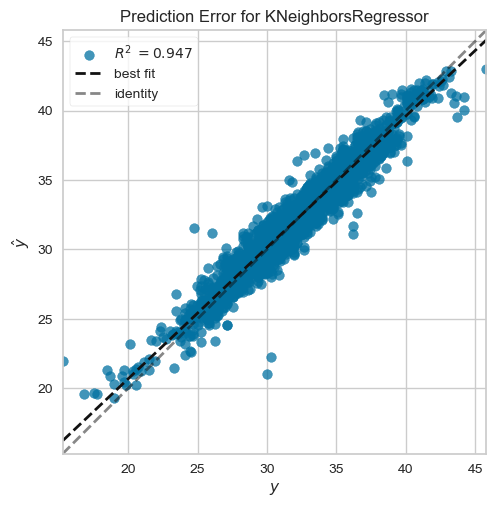

In [88]:
plot_model(model, plot = 'error')

A função evaluate_model exibe uma interface o usuário selecionar os gráficos disponíveis para um determinado modelo.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

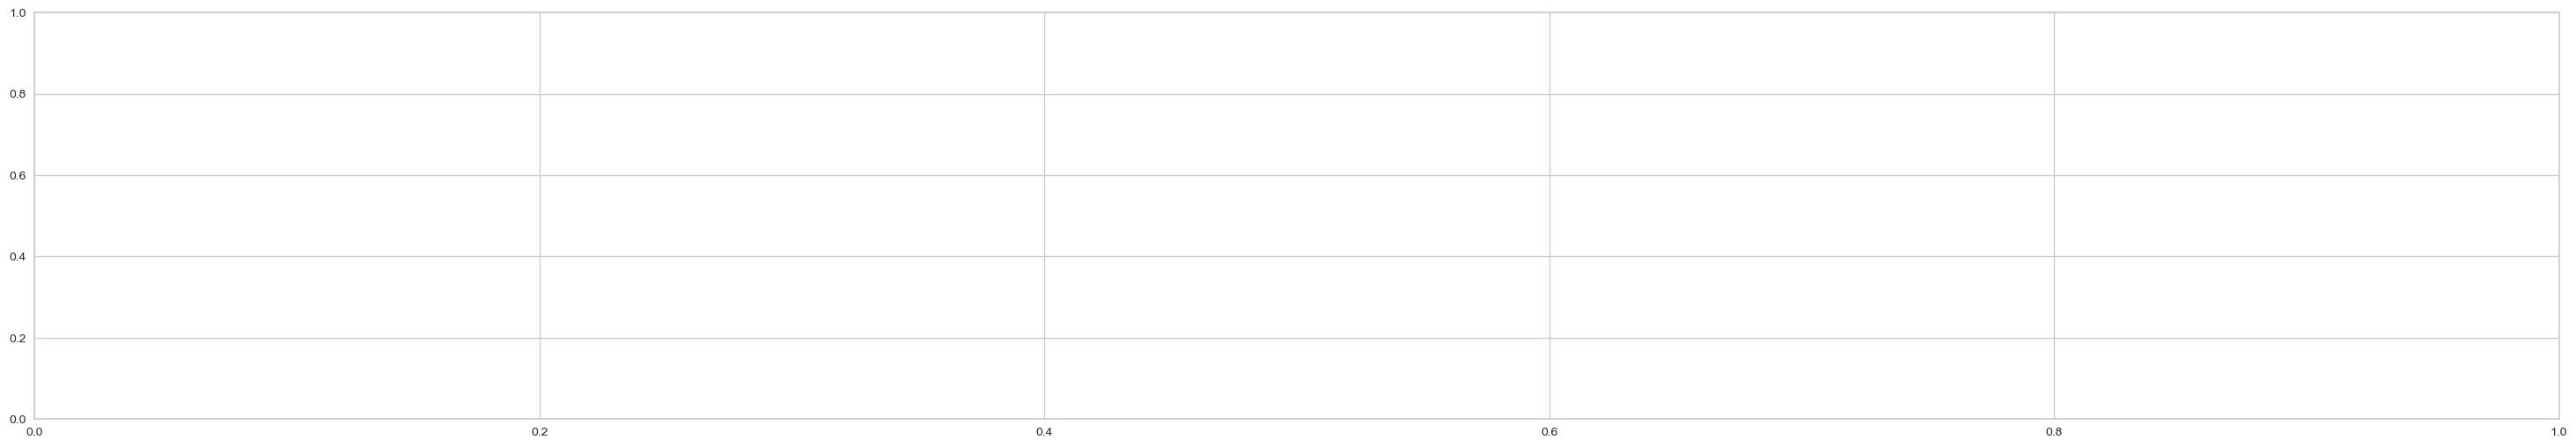

In [89]:
evaluate_model(model)

# Predict utilizando a amostra de teste.

Esta função realiza a predição utilizando o modelo especificado utilizando a amostra separada de teste.

In [130]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,16803.7642,340350587.0603,18448.5931,-26374537.8140,6.1540,507.9522


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,prediction_label
5961,Golf,2016,Semi-Auto,19435,Diesel,30,62.799999,2.0,17142,17794.813952
12640,Touran,2016,Manual,28304,Diesel,30,64.199997,1.6,15498,14681.566138
7145,Tiguan,2017,Manual,27897,Diesel,150,58.900002,2.0,17790,18110.385393
10418,Golf,2015,Automatic,56354,Petrol,200,39.799999,2.0,17199,19245.416668
5139,Sharan,2016,Manual,45372,Diesel,125,56.500000,2.0,15299,14627.747621
...,...,...,...,...,...,...,...,...,...,...
10303,Polo,2018,Manual,13953,Petrol,150,58.900002,1.0,10595,11364.292966
2398,T-Roc,2019,Manual,5262,Petrol,145,44.099998,1.0,19490,19160.290734
2479,Polo,2016,Semi-Auto,40200,Petrol,20,60.099998,1.2,9995,9994.099100
7266,Tiguan,2018,Manual,10942,Petrol,150,46.299999,1.4,18240,19123.124810


# Predict utilizando os dados de validação.

In [91]:
validation_predictions = predict_model(model, data=data_validation)
validation_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,17278.6977,359852270.8784,18969.7726,-27174584.7094,6.1727,517.9634


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,prediction_label
0,T-Roc,2020,Manual,10,Petrol,145,42.200001,1.5,31895,25049.547250
1,T-Roc,2019,Semi-Auto,2500,Petrol,145,32.500000,2.0,33785,32391.592404
2,T-Roc,2019,Manual,3392,Diesel,145,50.400002,2.0,22230,22307.125855
3,T-Roc,2019,Semi-Auto,2423,Diesel,145,49.599998,2.0,25990,25111.676745
4,T-Roc,2020,Manual,322,Diesel,145,50.400002,2.0,27990,23302.381219


##### Verificando a performance do modelo aplicado aos dados de validação.

In [92]:
from pycaret.utils.generic import check_metric

In [93]:
check_metric(validation_predictions.price, validation_predictions.prediction_label, 'R2')

0.9534

# Finalize Model

Esta função treina o algoritmo e cria o modelo utilizando todo o conjunto de dados.

In [94]:
final_model = finalize_model(model)

In [95]:
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\MARCIO~1\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['year', 'mileage', 'tax', 'mpg',
                                             'engineSize'],
                                    transformer=SimpleImputer())),
                ('cate...
                 TransformerWrapper(include=['model'],
                                    transformer=LeaveOneOutEncoder(cols=['model'],
                                                                   handle_missing='return_nan',
                                                                   random_state=123))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['tax'],
                                    transformer=KBinsDiscretizer

# Save model

Esta função realiza a persistencia do modelo em disco.

In [96]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\MARCIO~1\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['year', 'mileage', 'tax', 'mpg',
                                              'engineSize'],
                                     transformer=SimpleImputer())),
                 ('cate...
                  TransformerWrapper(include=['model'],
                                     transformer=LeaveOneOutEncoder(cols=['model'],
                                                                    handle_missing='return_nan',
                                                                    random_state=123))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['tax'],
                                     transformer=K

##### Verificando o arquivo em disco.

In [98]:
import pickle

In [105]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [127]:
your_model = load_model('model')

Transformation Pipeline and Model Successfully Loaded


In [134]:
prediction = predict_model(your_model, data=data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,16756.7273,337870229.9810,18381.2467,-28725033.3396,6.1770,520.4911


In [154]:
prediction = predict_model(your_model, data=valid)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,16758.7741,337932559.8118,18382.9421,-28719872.1291,6.1771,520.5295


In [147]:
valid.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,laranja,2020,31895,duas,10,pedra,145,42.2,1.5
1,laranja,2019,33785,duas,2500,pedra,145,32.5,2.0
2,laranja,2019,22230,duas,3392,pedra,145,50.4,2.0
3,laranja,2019,25990,duas,2423,pedra,145,49.6,2.0
4,laranja,2020,27990,duas,322,pedra,145,50.4,2.0


In [136]:
ttest =data_validation.head()

In [141]:
ttest['model'] = 'laranja'
ttest['fuelType'] = 'pedra'
ttest['transmission'] = 'duas'

In [153]:
valid = pd.concat([ttest, data]).reset_index()

In [151]:
valid_2 = pd.concat([data, data]).reset_index()

In [25]:
teste = pd.read_excel("teste.xlsx")

In [29]:
teste = teste[[ 'level_1','level_2', 'level_3', 'monthly_beer_volume' ,
                                                  'number_of_reviews_filled', 'qty_poc_5k_cell']]

In [30]:
exp_cl = setup(   data = teste # data set 
                    ,experiment_name = "regressao01" 
                    ,target = 'monthly_beer_volume'
                    ,session_id = 123 
                    ,profile = False 
                  #  , numeric_features = ['number_of_reviews_filled', 'qty_poc_5k_cell']
                   # , categorical_features = ['level_1',	'level_2',	'level_3']
                
                  #  ,transform_target = True 
                 #   ,normalize = True

                    #,bin_numeric_features = ['tax']
                 )

,Description,Value
0,Session id,123
1,Target,monthly_beer_volume
2,Target type,Regression
3,Original data shape,"(3000, 6)"
4,Transformed data shape,"(3000, 15)"
5,Transformed train set shape,"(2100, 15)"
6,Transformed test set shape,"(900, 15)"
7,Numeric features,2
8,Categorical features,3
9,Preprocess,True


In [27]:
df_transformed = get_config("X_train")

In [43]:
best_model = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,154.2230,318548.8894,536.9939,-0.0365,1.4178,2.6853,1.1990
lr,Linear Regression,153.0176,315575.6500,534.1490,-0.0245,1.4070,2.7084,4.3190
br,Bayesian Ridge,153.1164,316005.7944,534.6417,-0.0269,1.4064,2.7289,1.2490
ridge,Ridge Regression,153.0617,315667.3752,534.3368,-0.0257,1.4063,2.7306,1.3630
huber,Huber Regressor,152.8954,313979.7151,532.7627,-0.0189,1.4054,2.8501,1.2190
gbr,Gradient Boosting Regressor,157.1990,320839.5547,538.9930,-0.0455,1.4394,2.9189,1.2770
omp,Orthogonal Matching Pursuit,157.7108,321197.6527,539.9560,-0.0514,1.5090,3.0515,1.8310
lasso,Lasso Regression,160.9789,328107.2998,545.7960,-0.0757,1.5573,3.2190,1.4760
en,Elastic Net,160.9789,328107.2998,545.7960,-0.0757,1.5573,3.2190,1.3770
llar,Lasso Least Angle Regression,160.9789,328107.2998,545.7960,-0.0757,1.5573,3.2190,1.5420


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [44]:
print(best_model)

AdaBoostRegressor(random_state=123)


In [45]:
best_model

AdaBoostRegressor(random_state=123)

In [46]:
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,209.9036,625908.0768,791.1435,-0.0239,1.5180,2.8635
1,172.1277,662097.9830,813.6940,-0.0098,1.3894,3.1613
2,159.4955,251603.8558,501.6013,-0.0411,1.4076,2.3174
3,159.4136,337156.5619,580.6518,-0.0415,1.3839,2.2291
4,107.9517,72408.4409,269.0882,-0.0454,1.3156,1.7629
5,148.9290,229345.0821,478.8999,-0.0478,1.4678,3.0789
6,167.3425,277611.4059,526.8884,-0.0463,1.4211,1.6185
7,159.7351,458947.6802,677.4568,-0.0337,1.4990,4.1986
8,129.9547,104283.4539,322.9295,-0.0572,1.3888,2.8392


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
model_2 = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,208.4238,617184.0958,785.6107,-0.0096,1.5134,3.2333
1,170.3915,657035.5356,810.5773,-0.0021,1.3736,3.1480
2,153.7094,243274.8466,493.2290,-0.0067,1.3486,2.4924
3,156.7350,332100.8440,576.2819,-0.0259,1.3632,2.4373
4,107.6672,71610.6198,267.6016,-0.0339,1.3120,1.8996
5,148.5509,225971.1589,475.3642,-0.0324,1.4662,3.2130
6,168.7493,272222.8778,521.7498,-0.0260,1.4323,1.7951
7,159.0050,456553.5910,675.6875,-0.0283,1.4922,4.5217
8,128.7199,101547.6984,318.6655,-0.0295,1.3701,2.7793


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
exp_clf02 = setup(   data = teste # data set 
                    ,experiment_name = "regressao02" 
                    ,target = 'monthly_beer_volume'
                    ,session_id = 123 
                    ,profile = False 
                    , numeric_features = ['number_of_reviews_filled', 'qty_poc_5k_cell']
                    , categorical_features = ['level_1','level_2', 'level_3']
                
                    ,transform_target = True 
                    ,normalize = True
                    ,transformation = True
                    #,bin_numeric_features = ['tax']
                 )

,Description,Value
0,Session id,123
1,Target,monthly_beer_volume
2,Target type,Regression
3,Original data shape,"(3000, 6)"
4,Transformed data shape,"(3000, 15)"
5,Transformed train set shape,"(2100, 15)"
6,Transformed test set shape,"(900, 15)"
7,Numeric features,2
8,Categorical features,3
9,Preprocess,True


In [63]:
exp_clf02

In [59]:
prep_pipe  = get_config("X_train")

In [62]:
print(prep_pipe)

           level_1                          level_2       level_3  \
2918  Liquor Store           Warehouse/Liquor Store  Liquor Store   
529   Liquor Store           Warehouse/Liquor Store  Liquor Store   
970   Liquor Store           Warehouse/Liquor Store  Liquor Store   
1450     Groceries  Supermarket (More than 4 boxes)   Supermarket   
2997  Liquor Store       Market (Less than 4 boxes)         Store   
...            ...                              ...           ...   
1147  Liquor Store       Market (Less than 4 boxes)         Store   
2154     Groceries       Market (Less than 4 boxes)         Store   
1766     Groceries       Market (Less than 4 boxes)         Store   
1122     Groceries       Market (Less than 4 boxes)         Store   
1346     Groceries  Supermarket (More than 4 boxes)   Supermarket   

      number_of_reviews_filled  qty_poc_5k_cell  
2918                137.714279               57  
529                  14.000000              115  
970                  

In [57]:
prep_pipe.transform() 

SpecificationError: nested renamer is not supported